# 📘 Mini Projeto: Data-Driven Insights (Módulo 01)
---

### Projeto prático de exploração e visualização de dados com Python, utilizando como base dados de vendas simuladas em arquivo csv.

Origem : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

Créditos: Originalmente escrito por María Carina Roldán, membro da comunidade Pentaho, consultora de BI (Assert Solutions), Argentina. Este trabalho está licenciado sob a Licença Creative Commons Atribuição-Uso Não Comercial-Compartilhamento pela mesma Licença 3.0 Não Adaptada. Modificado por Gus Segura em junho de 2014.

Licença
CC0: Public Domain


### Objetivo
Explorar, transformar e visualizar dados com base em estruturas do Python e bibliotecas como pandas, numpy e matplotlib, gerando insights descritivos a partir da análise.


# 1. Importação de Bibliotecas

In [ ]:
%pip install pandas
%pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Leitura e Exploração Inicial da Base
---

## Durante a análise da estrutura da base, foram identificados os seguintes tipos de dados:

### `int64` — Números Inteiros
Utilizado para armazenar valores numéricos sem casas decimais.

#### Colunas com este tipo:
- `ORDERNUMBER`
- `QUANTITYORDERED`
- `ORDERLINENUMBER`
- `QTR_ID`, `MONTH_ID`, `YEAR_ID`
- `MSRP`

*Aplicações:* Códigos de pedido, quantidade de itens, datas estruturadas, valores fixos.

### `float64` — Números Decimais
Representa dados numéricos com ponto flutuante (com casas decimais).

#### Colunas com este tipo:
- `PRICEEACH`
- `SALES`

*Aplicações:* Preço unitário, total de vendas — úteis para operações financeiras e agregações.

### `object` — Dados Textuais ou Mistos
Este tipo geralmente representa strings, mas pode conter qualquer tipo de dado não numérico.

#### Colunas com este tipo:
- `ORDERDATE` *(precisa ser convertida para datetime para análise temporal)*
- `STATUS`, `PRODUCTLINE`, `PRODUCTCODE`, `CUSTOMERNAME`
- `PHONE`, `ADDRESSLINE1`, `ADDRESSLINE2`
- `CITY`, `STATE`, `POSTALCODE`, `COUNTRY`, `TERRITORY`
- `CONTACTLASTNAME`, `CONTACTFIRSTNAME`
- `DEALSIZE`

*Aplicações:* Informações textuais, classificações de produto, localização geográfica, nomes de cliente e contato.


### Observação:
- A coluna `ORDERDATE` foi lida como `object` porque contém strings de datas.
- Para análises de séries temporais (ex: evolução de vendas por mês), deve ser convertida com:
```python
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


## Visão Analítica da Estrutura Comercial


### Perfil de Vendas
- A coluna `SALES` mostra valores monetários por item da linha de pedido.
- Os campos `QUANTITYORDERED` e `PRICEEACH` influenciam diretamente no cálculo de vendas.
- A variável `DEALSIZE` indica o porte do cliente ou do negócio — **Small**, **Medium**, **Large**.


### Categorias de Produto
- A coluna `PRODUCTLINE` permite agrupar os dados por tipo de produto (ex: Classic Cars, Motorcycles etc).
- A ligação entre `PRODUCTLINE` e `PRODUCTCODE` revela a estrutura dos catálogos internos da empresa.


### Informações Geográficas
- Com `CITY`, `STATE`, `COUNTRY` e `TERRITORY`, é possível criar mapas de vendas por região ou identificar padrões geográficos.
- Ausência de dados em colunas como `STATE` ou `POSTALCODE` sugere necessidade de limpeza ou tratamento.


### Análise Temporal
- As colunas `ORDERDATE`, `MONTH_ID`, `YEAR_ID` e `QTR_ID` permitem avaliações de sazonalidade, tendências e evolução ao longo do tempo.
- A data precisa ser convertida para o tipo `datetime` para melhor aproveitamento.


### Cliente e Contato
- Campos como `CUSTOMERNAME`, `CONTACTFIRSTNAME`, `CONTACTLASTNAME` e `PHONE` mostram o nível de detalhe de relacionamento comercial.
- Também podem ser usados para segmentações e personalizações em campanhas.








In [ ]:
# Carrega arquivo CSV usando pandas com encoding latin-1
df = pd.read_csv('/sales_data_sample.csv', encoding='latin-1')

In [ ]:
# Mostra as 5 primeiras linhas.
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
# Mostra o nome das colunas.
print(df.shape)

(2823, 25)


In [ ]:
# Mostra a quantidade de linhas/colunas do DataFrame.
print(df.columns)

for col in df.columns:
  print(col)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
ORDERNUMBER
QUANTITYORDERED
PRICEEACH
ORDERLINENUMBER
SALES
ORDERDATE
STATUS
QTR_ID
MONTH_ID
YEAR_ID
PRODUCTLINE
MSRP
PRODUCTCODE
CUSTOMERNAME
PHONE
ADDRESSLINE1
ADDRESSLINE2
CITY
STATE
POSTALCODE
COUNTRY
TERRITORY
CONTACTLASTNAME
CONTACTFIRSTNAME
DEALSIZE


In [ ]:
# Mostra os tipos de dados detectados pelo pandas (.dtypes).
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


# 3. Listas, Dicionários e Tuplas
---

## O código apresentado demonstra  como **listas**, **dicionários** e **tuplas** podem ser aplicados para extrair e organizar dados de um DataFrame no pandas e como transformar dados tabulares em estruturas Python nativas, facilitando análises rápidas, organização lógica, ou até exportação para outros contextos.

- **Lista (`list`)**: usada para capturar uma coluna categórica, neste caso `'PRODUCTLINE'`, permitindo operações como iteração simples ou análise de frequência.  
  Exemplo: visualizar os primeiros tipos de produto.

- **Dicionário (`dict`)**: associa elementos de duas colunas, conectando `'PRODUCTCODE'` com `'PRODUCTLINE'`. Essa forma é eficiente para buscas rápidas e categorização personalizada.  
  Insight: possibilita ver a relação direta entre código do produto e sua categoria.

- **Tupla (`tuple`)**: agrupa múltiplos valores de uma única linha em uma estrutura imutável, sendo útil para armazenar snapshots específicos.  
  Utilização: extrair detalhes pontuais de uma venda individual (categoria, código, valor).






In [ ]:
# Lista: Coluna de texto/categórica
# Usando a coluna 'PRODUCTLINE'
nomes = list(df['PRODUCTLINE'])
print("Primeiros 5 itens da lista de Product Line:")
for nome in nomes[:5]:
    print(nome)

# Dicionário: chave e valor, exemplo (product code:product line)
# Usando 'PRODUCTCODE' como chave e 'PRODUCTLINE' como valor
dicionario = dict(zip(df['PRODUCTCODE'][:3], df['PRODUCTLINE'][:3]))
print("\nExemplo de 3 pares do dicionário (Product Code: Product Line):")
print(dicionario)


# Tupla: informações de uma linha
# Usando 'PRODUCTLINE', 'PRODUCTCODE' e 'SALES' da primeira linha
linha0 = df.iloc[0]
minha_tupla = (linha0['PRODUCTLINE'], linha0['PRODUCTCODE'], linha0['SALES'])
print("\nTupla com informações da primeira linha (Product Line, Product Code, Sales):")
print(minha_tupla)

Primeiros 5 itens da lista de Product Line:
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles

Exemplo de 3 pares do dicionário (Product Code: Product Line):
{'S10_1678': 'Motorcycles'}

Tupla com informações da primeira linha (Product Line, Product Code, Sales):
('Motorcycles', 'S10_1678', np.float64(2871.0))


# 4. Estruturas Condicionais e Laços
---


## Avaliação de  dados de preços (`PRICEEACH`) para identificar faixas de valor, padrões iniciais e valores fora do padrão.Serve como base para estratégias personalizadas de vendas, oimização de precificação e inteligência de mercado.



### Faixas de Preço:
- Classificação em: **alto**, **intermediário**, **baixo**.
- **Benefício**: direcionamento de campanhas, ajustes de preço, segmentação de público.

### Desempenho Inicial:
- Soma dos 5 primeiros valores.
- **Benefício**: entender o comportamento de entrada de produtos ou serviços.

### Detecção de Outliers:
- Localiza o primeiro valor que ultrapassa um limite.
- **Benefício**: identificação de itens premium e oportunidades de upselling.


### Melhorias:
- Transformar em **função genérica reutilizável**.
- Integrar em **painel automatizado** para monitoramento em tempo real.



In [ ]:
# Escolha uma coluna numérica adequada
coluna_numerica = 'PRICEEACH'
primeiro_valor = df[coluna_numerica][0]

# Estrutura condicional personalizada:
# Substitua os valores (80, 50) conforme a distribuição da sua coluna 'PRICEEACH'.
if primeiro_valor > 80:
    print(f"O primeiro valor de {coluna_numerica} ({primeiro_valor}) é alto.")
elif primeiro_valor > 50:
    print(f"O primeiro valor de {coluna_numerica} ({primeiro_valor}) é intermediário.")
else:
    print(f"O primeiro valor de {coluna_numerica} ({primeiro_valor}) é baixo.")

# For para operar sobre n primeiros elementos de uma coluna numérica escolhida
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print(f"\nSoma dos 5 primeiros valores da coluna {coluna_numerica}:", soma)

# While: Encontrar o primeiro valor maior que um certo limite, definido de acordo com os dados
limite = 90  # Ajuste conforme o contexto da coluna escolhida (PRICEEACH)
i = 0
primeiro_valor_encontrado = None
while i < len(lista):
    if lista[i] > limite:
        primeiro_valor_encontrado = lista[i]
        break
    i += 1

if primeiro_valor_encontrado is not None:
    print(f"\nPrimeiro valor na lista maior que {limite} encontrado: {primeiro_valor_encontrado}")
else:
    print(f"\nNenhum valor maior que {limite} encontrado nos primeiros 5 da coluna {coluna_numerica}.")

O primeiro valor de PRICEEACH (95.7) é alto.

Soma dos 5 primeiros valores da coluna PRICEEACH: 455.05

Primeiro valor na lista maior que 90 encontrado: 95.7


# 5. Operadores Aritméticos e Manipulação de Dados
---

## Análise estratégica para gestao de receita e precificação

### O código calcula duas variáveis financeiras:

- `TOTAL_PRICE`: Receita bruta por item (quantidade × preço unitário).

- `DISCOUNT_AMOUNT`: Desconto fixo de 10% aplicado sobre o total.

Essas variáveis ajudam a entender:

- O impacto financeiro de cada venda.

- A padronização da política de descontos.

- A base para análises mais estratégicas, como margem líquida e desempenho dos produtos.

Também abre espaço para evoluções:

- Descontos dinâmicos e personalizados.

- Integração com visualizações ou modelos preditivos.



### Objetivo da Análise
- Calcular `TOTAL_PRICE` e `DISCOUNT_AMOUNT` por pedido.
- Monitorar linha a linha o desempenho financeiro.


####  Rentabilidade em Tempo Real
- Identifica pedidos com maior valor agregado.
- Detecta clientes com maior ticket médio.

#### Gestão Inteligente de Descontos
- Aplica descontos fixos.
- Testa estratégias como:
  - Descontos progressivos.
  - Campanhas por fidelidade ou segmentação.

#### Simulação de Margens
- Permite testes do tipo:
  - "E se o desconto fosse 15%?"
  - "Qual é o impacto por pedido?"


### Recomendação Estratégica
- Integrar esses cálculos num **painel de controle automatizado**:
  - Acompanhamento de receita por cliente.
  - Alerta de descontos excessivos.
  - Sugestões para ajustes de margem em tempo real.


In [ ]:
# Realize operações matemáticas (soma, subtração, multiplicação ou divisão) entre colunas ou valores de interesse da base (ex: diferença de duas notas, preço com desconto, etc).
# Calcular o preço total de cada linha de pedido
df['TOTAL_PRICE'] = df['PRICEEACH'] * df['QUANTITYORDERED']

# Crie uma nova coluna no DataFrame aplicando um cálculo simples.
# Calcular o valor do desconto (assumindo 10% de desconto para demonstração)
df['DISCOUNT_AMOUNT'] = df['TOTAL_PRICE'] * 0.10

# Exibir as colunas originais e as novas colunas
print(df[['PRICEEACH', 'QUANTITYORDERED', 'TOTAL_PRICE', 'DISCOUNT_AMOUNT']].head())


   PRICEEACH  QUANTITYORDERED  TOTAL_PRICE  DISCOUNT_AMOUNT
0      95.70               30      2871.00          287.100
1      81.35               34      2765.90          276.590
2      94.74               41      3884.34          388.434
3      83.26               45      3746.70          374.670
4     100.00               49      4900.00          490.000


# 6. NumPy e Arrays Numéricos
---

## Avaliando o impacto financeiro de reajustes para ajudar nas decisões sobre margens, descontos ou posicionamento de produto com base no Array de Vendas.

### Crescimento Potencial e Estratégia de Reajuste
**Operação:** `array + 50`  
**Aplicação:** Simula aumento de preço, promoção com bônus ou previsão otimista.  
**Insight:** Avaliar impacto financeiro de reajustes ajuda em decisões sobre margens, descontos ou posicionamento de produto.


### Comportamento Exponencial nas Vendas:
**Operação:** `array ** 2`  
- Ideal para projeções de crescimento acelerado e retorno de investimentos.  
- Útil para pensar em expansão de negócios e análises de longo prazo.


### Efeito de Outliers e Ajustes Manuais:
**Operação:** Substituição de `array[0]` por `999`  
- Representa venda atípica, erro ou teste de sensibilidade.  
- Pode distorcer média/soma → importante aplicar filtros ou normalização.


### Média e Soma — Indicadores de Performance:
- Valores:
 - Soma: R$ 2.299

 - Média: R$ 383,17  

### Aplicações:
- Avaliar metas de vendas.

- Medir produtividade por equipe ou região.

- Embasar decisões estratégicas sobre investimentos, estoques e campanhas.

- Ajuste nos valores (+50):
  - simula aumento de preços ou bônus → útil para testar impacto no faturamento.

- Elevação ao quadrado dos valores:
  - representa crescimento acelerado → ajuda a visualizar projeções ou retornos exponenciais.

- Alteração manual (valor 999):
  -  ilustra o efeito de outliers → importante para checar distorções em métricas como média.

- Métricas agregadas:
  - Soma: R$ 2.299
  - Média: R$ 383,16 → servem para avaliar metas, desempenho e orientar decisões estratégicas.

In [ ]:
# DataFrame com uma coluna numérica
df = pd.DataFrame({
    'SALES': [100, 200, 150, 300, 250, 400]
})

# Crie um array NumPy a partir de uma coluna numérica da base.
array = np.array(df['SALES'])

# Realize pelo menos duas operações vetorizadas com esse array (ex: somar, multiplicar, elevar ao quadrado elementos).
array_somado = array + 50         # Adiciona 50 a cada elemento
array_quadrado = array ** 2       # Eleva cada elemento ao quadrado

# Mostre como acessar, modificar e exibir partes do array (fatiamento/slicing ou indexação).
print("Primeiros 3 elementos do array original:", array[:3])
array[0] = 999                    # Modifica o primeiro elemento
print("Array após modificação:", array[:3])

# Mostre como fazer uma operação agregada, como soma ou média, sobre o array.
print("Soma dos elementos:", array.sum())
print("Média dos elementos:", array.mean())


Primeiros 3 elementos do array original: [100 200 150]
Array após modificação: [999 200 150]
Soma dos elementos: 2299
Média dos elementos: 383.1666666666667


# 7. Acesso e Manipulação de Dados com Pandas
---

## Com base na média de vendas por linha de produto, é possível extrair um insight estratégico importante para decisões comerciais.

### Foco em Linhas de Alto Desempenho:
- Classic Cars possui a maior média de vendas (R$ 4.053), destacando-se como a linha mais lucrativa.

- Trucks and Buses e Motorcycles também têm desempenho acima da média geral, indicando boa aceitação e ticket elevado.

### Oportunidade de Crescimento:
- Linhas como Trains, Vintage Cars, e Ships apresentam média de vendas abaixo de 3.200. Essas linhas podem estar:

 - Posicionadas para públicos com menor poder aquisitivo

 - Com menor demanda ou marketing menos eficaz

 - Com oportunidades de reestruturação de catálogo, promoções, ou melhor segmentação de clientes

### Melhorias:
- Refinar campanhas de marketing para Classic Cars, destacando seus atributos e reforçando canais de vendas.

- Reavaliar o portfólio de linhas com desempenho mais fraco e considerar testes A/B com novos preços ou designs.

- Alinhar estoque e operação logística com os dados de demanda média por linha para evitar excesso ou escassez.




In [ ]:
# Selecionar linhas/colunas usando .loc, .iloc ou filtrando por condição
# Seleciona linhas onde o 'DEALSIZE' é 'Medium' (tamanho médio de pedido)
medium_deals = df.loc[df['DEALSIZE'] == 'Medium']
print("Pedidos de tamanho médio (5 primeiros):")
display(medium_deals.head())

# Seleciona colunas específicas usando .iloc (por exemplo, as 3 primeiras colunas)
selected_columns_iloc = df.iloc[:, :3]
print("\nPrimeiras 3 colunas usando iloc (5 primeiros registros):")
display(selected_columns_iloc.head())

# Seleciona colunas específicas usando .loc (por exemplo, 'ORDERNUMBER' e 'SALES')
selected_columns_loc = df.loc[:, ['ORDERNUMBER', 'SALES']]
print("\nColunas 'ORDERNUMBER' e 'SALES' usando loc (5 primeiros registros):")
display(selected_columns_loc.head())


# Use algum método de pandas para contar ou agrupar informações simples (ex: .value_counts(), .groupby()), mostrando o resultado em Markdown.
# Contar o número de pedidos por tipo de 'DEALSIZE'
dealsize_counts = df['DEALSIZE'].value_counts()
print("\nContagem de pedidos por tamanho:")
display(dealsize_counts)

# Crie uma pequena análise agregada interessante .
# Calcular a média de vendas por tipo de linha de produto ('PRODUCTLINE')
average_sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].mean()
print("\nMédia de vendas por linha de produto:")
display(average_sales_by_productline)


Pedidos de tamanho médio (5 primeiros):


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,TOTAL_PRICE,DISCOUNT_AMOUNT
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34,388.434
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70,374.670
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00,490.000
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium,3479.76,347.976
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium,4800.00,480.000



Primeiras 3 colunas usando iloc (5 primeiros registros):


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH
0,10107,30,95.70
1,10121,34,81.35
2,10134,41,94.74
3,10145,45,83.26
4,10159,49,100.00



Colunas 'ORDERNUMBER' e 'SALES' usando loc (5 primeiros registros):


,ORDERNUMBER,SALES
0,10107,2871.00
1,10121,2765.90
2,10134,3884.34
3,10145,3746.70
4,10159,5205.27



Contagem de pedidos por tamanho:


,count
DEALSIZE,
Medium,1384
Small,1282
Large,157



Média de vendas por linha de produto:


,SALES
PRODUCTLINE,
Classic Cars,4053.377104
Motorcycles,3523.831843
Planes,3186.286176
Ships,3053.150128
Trains,2938.226883
Trucks and Buses,3746.810100
Vintage Cars,3135.339110


# 8. Visualização de Dados

# Gráfico de Linha (Evolução Temporal das Vendas)
## Visualização gráfica dos padrões de alta ou baixa nas vendas ao longo dos dias, revelando períodos de pico, sazonalidades ou até quedas inesperadas, essenciais para tomadas de decisão estratégicas.

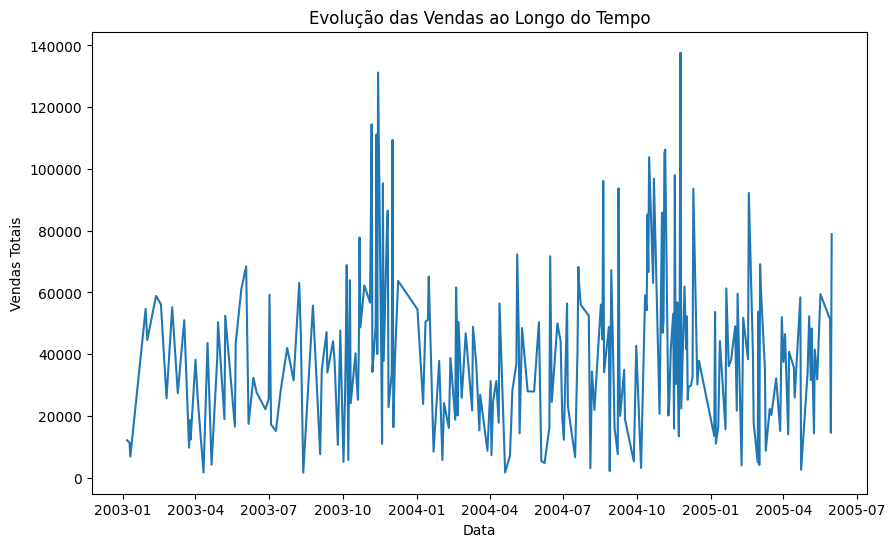

In [ ]:
# Gráfico de Linha (ex: evolução temporal; use 'Data' se houver)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Agrupar por data e somar as vendas para criar a série temporal
sales_over_time = df.groupby(df['ORDERDATE'].dt.date)['SALES'].sum()

# Configurar o tamanho da figura e gerar o gráfico
plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.show()


# Gráfico de Barras (categorias)
## O gráfico mostra quais linhas de produto geram mais receita, destacando categorias líderes e revelando oportunidades de marketing ou investimento.

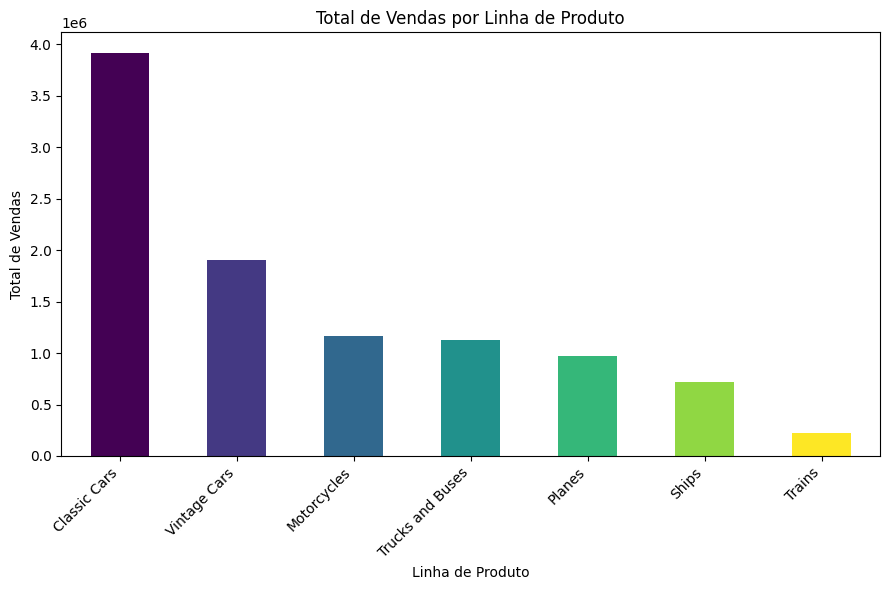

In [ ]:
# Gráfico de Barras (categorias)
# Comparando vendas totais por Product Line
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False) # Sort for better visualization
plt.figure(figsize=(9, 6))

# Use a colormap to get a distinct color for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(sales_by_productline)))
sales_by_productline.plot(kind='bar', color=colors)

plt.title('Total de Vendas por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Gráfico de Dispersão

## Permite visualizar a relação entre `PRICEEACH` (o preço de cada produto) e `SALES` (o valor total de vendas de uma linha de pedido) e como o preço unitário influencia o total de vendas, separando os dados pelo tamanho da negociação com cores distintas e identificando padrões por categoria.


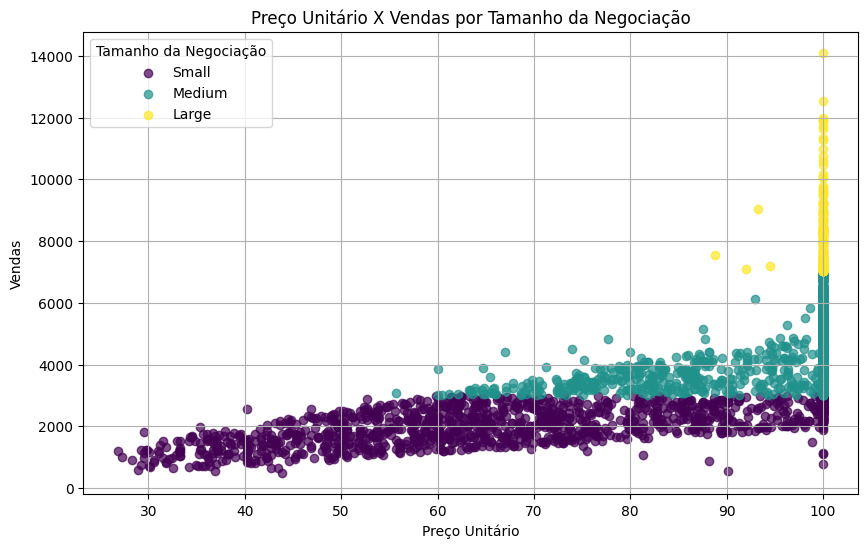

In [ ]:
# Gráfico de Dispersão
# Mostrando a relação entre 'PRICEEACH' (preço unitário) e 'SALES' (vendas),
# diferenciando os pontos pelo tipo de 'DEALSIZE' (tamanho da negociação)

# Obter os diferentes tipos de tamanho de negociação para definir as cores
deal_sizes = df['DEALSIZE'].unique()

# Utilizar o mapa de cores 'viridis' para gerar cores distintas
colors = plt.cm.viridis(np.linspace(0, 1, len(deal_sizes)))

# Ajustar o tamanho da figura para facilitar a visualização
plt.figure(figsize=(10, 6))

# Laço para plotar cada categoria de 'DEALSIZE' com cor e legenda
for i, deal_size in enumerate(deal_sizes):
    subset = df[df['DEALSIZE'] == deal_size]
    plt.scatter(subset['PRICEEACH'], subset['SALES'],
                color=colors[i], label=deal_size, alpha=0.7)

# Títulos e legendas do gráfico
plt.title('Preço Unitário X Vendas por Tamanho da Negociação')
plt.xlabel('Preço Unitário')
plt.ylabel('Vendas')
plt.legend(title='Tamanho da Negociação')
plt.grid(True)
plt.show()



---
---
# Relatório Final
---
---
Este projeto explorou um conjunto de dados de vendas simuladas para extrair insights estratégicos utilizando Python, pandas, NumPy e Matplotlib. O objetivo foi analisar, transformar e visualizar dados para identificar padrões de vendas, desempenho de produtos e comportamento de clientes.

## Principais Insights e Análises Realizadas:

1.  **Estrutura e Tipos de Dados:** A análise inicial dos tipos de dados (`int64`, `float64`, `object`) revelou a necessidade de converter a coluna `ORDERDATE` para o formato `datetime` para análises temporais precisas.
2.  **Uso de Estruturas Python Nativas:** Demonstramos a aplicação de listas, dicionários e tuplas para organizar e acessar dados, facilitando a extração de informações específicas (ex: lista de linhas de produto, mapeamento de código-produto, detalhes de pedidos individuais).
3.  **Estruturas Condicionais e Laços:** A avaliação de preços unitários (`PRICEEACH`) utilizando `if/elif/else`, `for` e `while` permitiu categorizar valores, somar elementos e identificar o primeiro valor acima de um limite, o que é útil para identificar itens de alto valor ou detectar anomalias.
4.  **Operadores Aritméticos e Manipulação de Dados:** Calculamos `TOTAL_PRICE` (receita bruta por item) e `DISCOUNT_AMOUNT` (desconto fixo de 10%), fornecendo uma visão financeira direta por linha de pedido e a base para simulações de margem.
5.  **NumPy e Arrays Numéricos:** Utilizamos arrays NumPy para simular reajustes de preços (`array + 50`) e analisar crescimento potencial (`array ** 2`). A modificação manual de elementos (`array[0] = 999`) destacou o impacto de outliers nas métricas agregadas (soma e média).
6.  **Pandas para Acesso e Manipulação:** Demonstramos o uso de `.loc`, `.iloc` e filtros condicionais para selecionar dados. Agrupamentos (`.groupby()`) e contagens (`.value_counts()`) foram essenciais para análises agregadas, como a média de vendas por linha de produto e a contagem de pedidos por tamanho (`DEALSIZE`).

## Visualizações Chave:

-   **Gráfico de Linha (Evolução Temporal das Vendas):** Visualizou a série temporal das vendas, mostrando picos e padrões ao longo do tempo e revelando sazonalidades.
-   **Gráfico de Barras (Total de Vendas por Linha de Produto):** Identificou as linhas de produto mais lucrativas (Classic Cars, Vintage Cars, Motorcycles), orientando o foco estratégico.
-   **Gráfico de Dispersão (Preço Unitário X Vendas por Tamanho da Negociação):** Mostrou a relação entre `PRICEEACH` e `SALES`, destacando como o tamanho da negociação (`DEALSIZE`) influencia essa relação e identificando clusters por categoria de negociação.

## Conclusão e Recomendações:

As análises e visualizações realizadas neste projeto forneceram insights valiosos sobre o desempenho de vendas, a estrutura do catálogo de produtos e o comportamento dos clientes.

-   **Recomendações:**
    -   Focar em otimizar as estratégias para as linhas de produto de maior performance (Classic Cars).
    -   Investigar as linhas de menor performance para identificar causas e oportunidades de melhoria (preço, marketing, público-alvo).
    -   Utilizar os cálculos de preço total e desconto para análises de rentabilidade mais aprofundadas e simulações de cenários.
    -   Considerar a criação de painéis automatizados para monitorar em tempo real as métricas de vendas e desempenho por linha de produto e tamanho de negociação.

## Próximos Passos e Análises Futuras:

Para complementar a análise e aprofundar os insights, sugere-se as seguintes etapas:

-   **Análise de Clientes:** Investigar o comportamento de compra dos clientes, identificando os mais valiosos, sua frequência de compra e as linhas de produto que mais adquirem. Isso pode ser feito analisando as colunas `CUSTOMERNAME`, `ORDERNUMBER`, e a frequência de pedidos.
-   **Análise Geográfica Detalhada:** Utilizar as informações de `CITY`, `STATE`, `COUNTRY` e `TERRITORY` para criar mapas de calor ou outras visualizações geográficas que mostrem a distribuição espacial das vendas e identifiquem regiões de alto e baixo desempenho.
-   **Análise de Status de Pedido:** Explorar a coluna `STATUS` para entender o fluxo dos pedidos e identificar gargalos ou problemas comuns (ex: pedidos cancelados, em disputa).
-   **Previsão de Vendas:** Construir modelos preditivos baseados nos dados históricos (`ORDERDATE`, `SALES`, `PRODUCTLINE`, etc.) para prever vendas futuras e auxiliar no planejamento de estoque e metas.
-   **Segmentação de Clientes:** Aplicar técnicas de clusterização para segmentar clientes com base em seu comportamento de compra e características, permitindo campanhas de marketing mais direcionadas.

Este projeto serviu como uma base sólida para a análise dos dados de vendas. As etapas futuras propostas podem levar a insights ainda mais profundos e ações estratégicas mais eficazes.